## Diabeties Dataset
Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, feature_selection
from sklearn.metrics import mean_squared_error, r2_score

diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
print(diabetes_X.shape)
print(diabetes_y.shape)
print(diabetes_X.dtype)
print(diabetes_y.dtype)

(442, 10)
(442,)
float64
float64


We can look variance of each feature vector(columns). If the variance is 0, it means that feature has no effect to the outcome. We can eliminate these features.

In [16]:
feature_var = np.var(diabetes_X, axis=0)
print(feature_var)

[0.00226244 0.00226244 0.00226244 0.00226244 0.00226244 0.00226244
 0.00226244 0.00226244 0.00226244 0.00226244]


All features have a variance, so nothing to delete.

We can also draw a scatter plot to observe relation between total cholesterol / HDL and age. If they are linearly correlated, one of them can be removed from the dataset. We can reduce the dimension of data by applying these methods.

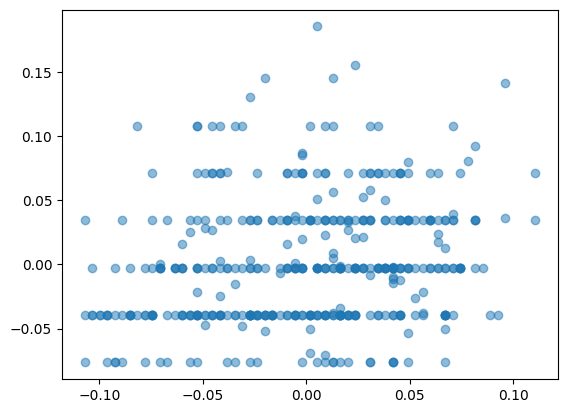

In [17]:
x_age = diabetes_X[:,0]
x_ch = diabetes_X[:,7]
plt.scatter(x_age, x_ch, alpha=0.5)
plt.show()

As we see from the figure, there is no meaningful relation between total cholesterol / HDL and age.

In [23]:
#get bmi index feature vector
diabetes_Xbmi = diabetes_X[:, np.newaxis, 2]

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes_Xbmi, diabetes_y, test_size=0.33, random_state=42)

Draw the training data

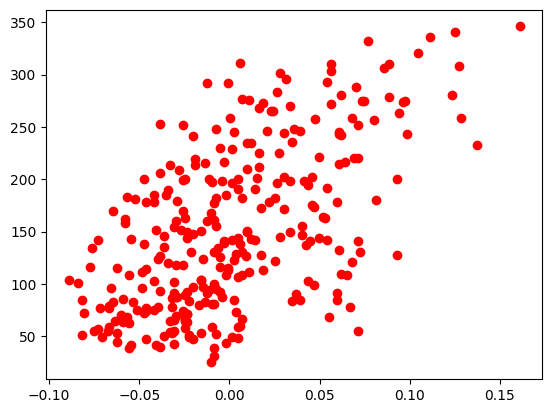

In [20]:
plt.scatter(X_train, y_train, color="red")
plt.show()

Apply linear regression and draw the fitted model

Slope (coefficients): 
 [972.87627375]
Intercept:  150.26267496245123
The loss, mean squared error: 3934.07
The coefficient of determination: 0.32


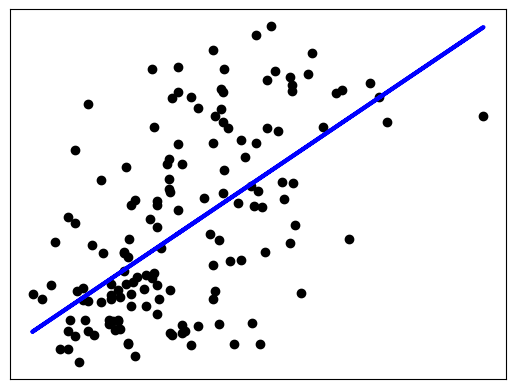

In [21]:

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

# The coefficients
print("Slope (coefficients): \n", regr.coef_)
# Intercept
print('Intercept: ', regr.intercept_)
# The mean squared error
print("The loss, mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("The coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

As it is seen in plot and R2 score(The coefficient of determination), there is a weak positive correlation between bmi index and disease progression.

In [22]:
y_pred_train = regr.predict(X_train)
print("The loss in training data: %.2f" % mean_squared_error(y_train, y_pred_train))

The loss in training data: 3876.03
